In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [3]:
wine_data = pd.read_csv('winequality-red.csv')

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.shape

(1599, 12)

In [10]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis

In [13]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


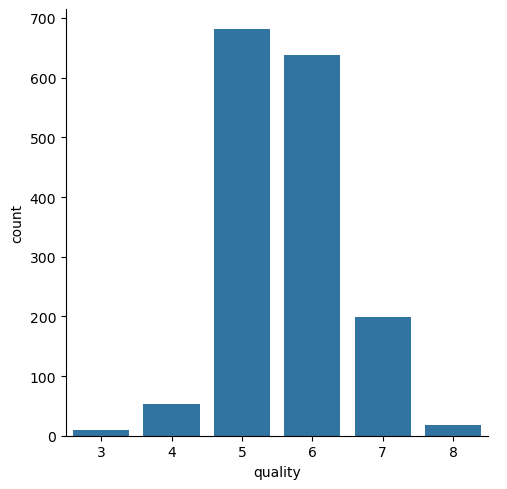

In [15]:
sns.catplot(x='quality', data = wine_data , kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

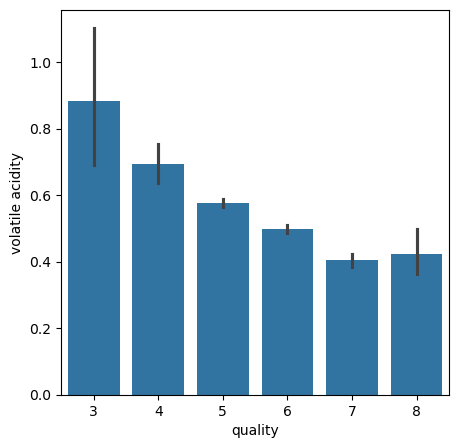

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

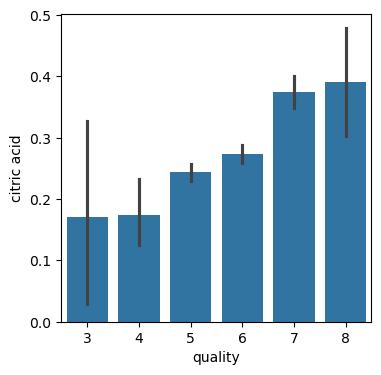

In [19]:
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='citric acid',data=wine_data)

In [26]:
Correlation = wine_data.corr()

<Axes: >

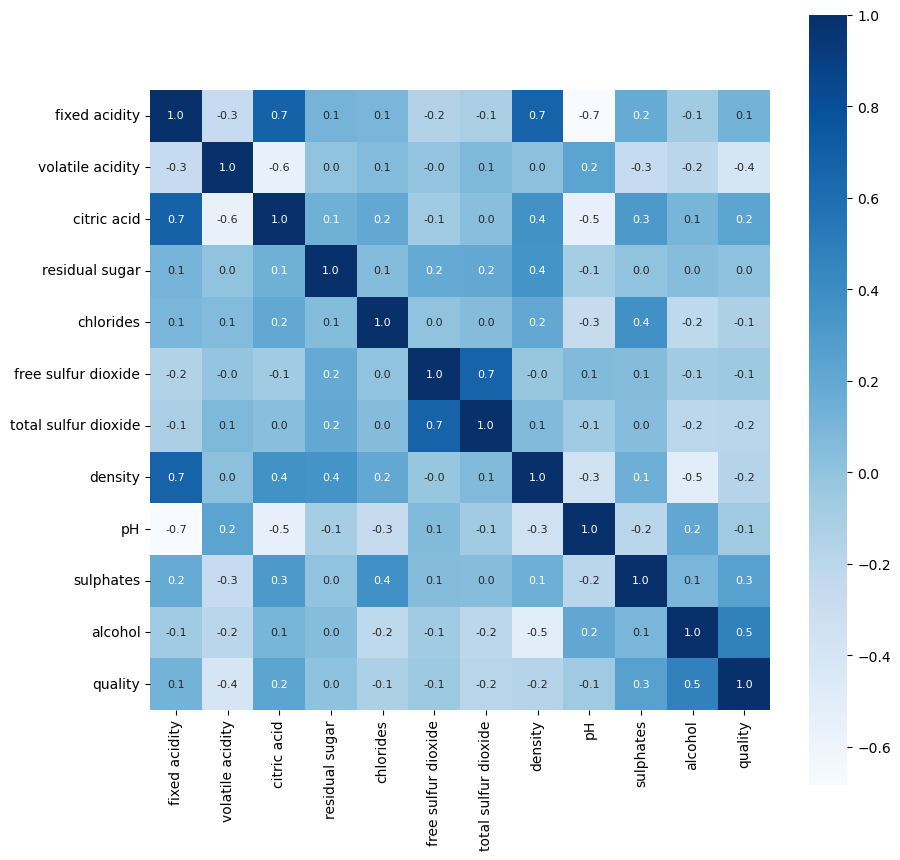

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(Correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Data Preprocessing 

In [33]:
X = wine_data.drop('quality',axis=1)

In [35]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


label binarization

In [53]:
y = wine_data['quality'].apply(lambda y_value : 2 if y_value >= 7 else 0)

In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [59]:
print(X.shape , X_train.shape , X_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model training:

Random Forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier()

In [65]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
from sklearn.metrics import accuracy_score

In [69]:
X_test_pred = model.predict(X_test)

In [71]:
test_data_accuracy = accuracy_score(X_test_pred , y_test)

In [73]:
print("Accuracy score is " , test_data_accuracy)

Accuracy score is  0.915625


Building a predictive Model

In [76]:
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [78]:
prediction = model.predict(input_data_reshaped)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
print(prediction)

[2]


In [82]:
if prediction[0] == 2:
    print("Good quality")
else:
    print("Bad quality")

Good quality
